In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Kalman filter for 2d tracking

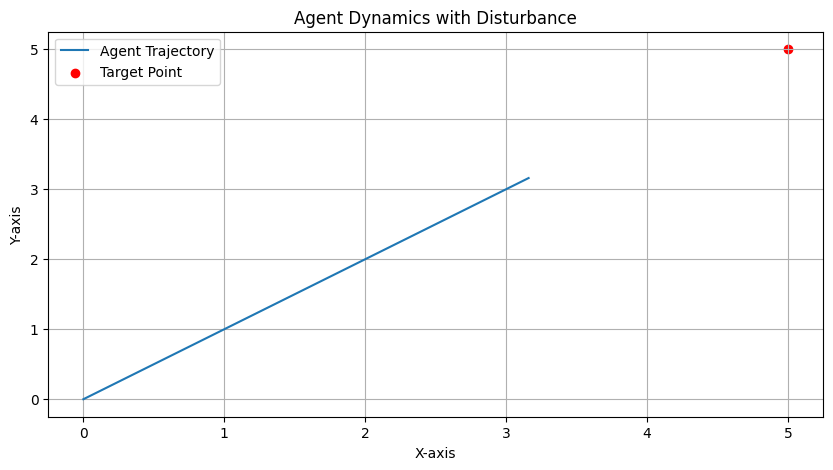

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate agent dynamics: dx/dt = -λ (x - x*) + disturbance, where x is in 2D.
def simulate_agent_dynamics(initial_state, target_state, lambda_, disturbance, dt, t_max):
    t = np.arange(0, t_max, dt)
    x = np.zeros((len(t), 2))
    x[0] = initial_state
    target_state = np.array(target_state)
    for i in range(1, len(t)):
        # The dynamics are computed using the previous state and a constant disturbance.
        dx = -lambda_ * (x[i-1] - target_state) + disturbance
        x[i] = x[i-1] + dx * dt
    return t, x

# 2D Gaussian disturbance function.
def gaussian_disturbance(x, y, mu, sigma):
    return np.exp(-((x - mu[0])**2 + (y - mu[1])**2) / (2 * sigma**2))

# Plot the trajectory of the agent.
def plot_trajectory(t, x, target_state):
    plt.figure(figsize=(10, 5))
    plt.plot(x[:, 0], x[:, 1], label='Agent Trajectory')
    plt.scatter(target_state[0], target_state[1], color='red', label='Target Point')
    plt.title('Agent Dynamics with Disturbance')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.grid(True)
    plt.show()

# Parameters
initial_state = [0.0, 0.0]
target_state = [5.0, 5.0]
lambda_ = 0.1
dt = 0.01
t_max = 10.0
sigma = 1.0
    
# Create a constant disturbance computed using the Gaussian function at the initial state.
disturbance_value = gaussian_disturbance(initial_state[0], initial_state[1], target_state, sigma)
disturbance = np.array([disturbance_value, disturbance_value])
    
# Simulate the agent dynamics.
t, x = simulate_agent_dynamics(initial_state, target_state, lambda_, disturbance, dt, t_max)
    
# Plot the trajectory.
plot_trajectory(t, x, target_state)
